In [28]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}
plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

we1_list = [0, 1000]
we2_list = [0, 1000]

casc_t = np.zeros((len(we1_list), len(we2_list), plot_params['wnum']), dtype=complex)
casc_r = np.zeros((len(we1_list), len(we2_list), plot_params['wnum']),dtype=complex)

for we1 in we1_list:
    for we2 in we2_list:
        sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
        sim_params['k1'] = sim_params['k']/2
        sim_params['k2'] = sim_params['k']/2
        sim_params['gnd'] = 1
        sim_params['g'] = 5 # rabi frequency
        sim_params['gamma']  = 0.043 # emitter linewidth
        sim_params['Gc'] = 0     # additional loss channel
        sim_params['we'] = we1   # cavity detuning
        sim_params['wc'] = 0
        sim_params['J']  = 0     # dipole-dipole coupling  
        sim_params['N']  = 1
        sim_params['jvec'] = np.zeros(int((10-1)*10/2))
        sim_params['We'] = sim_params['we']*np.ones((1,10))


        # fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

        # n_list = [1, 10, 100]
        # wc_list = [0, 5, 10]
        # for i in range(len(wc_list)):
        pt1 = PhotonTransmission(plot_params, sim_params)
        x_1, y1_1, y2_1 = pt1.calc_first_subspace()
        # print(y1)
        # print(y2)

        plot_params['s'] = 0.2
        plot_params['lim1'] = -80
        plot_params['lim2'] = 80
        plot_params['wnum'] = 5000
        plot_params['time_val'] = 0

        sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
        sim_params['k1'] = sim_params['k']/2
        sim_params['k2'] = sim_params['k']/2
        sim_params['gnd'] = 1
        sim_params['g'] = 5 # rabi frequency
        sim_params['gamma']  = 0.043 # emitter linewidth
        sim_params['Gc'] = 0     # additional loss channel
        sim_params['we'] = we2    # cavity detuning
        sim_params['wc'] = 0
        sim_params['J']  = 0     # dipole-dipole coupling  
        sim_params['N']  = 1
        sim_params['jvec'] = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))
        sim_params['We'] = sim_params['we']*np.ones((1,sim_params['N']))

        pt2 = PhotonTransmission(plot_params, sim_params)
        x_2, y1_2, y2_2 = pt2.calc_first_subspace()

        for j in range(len(y1_1)):
            S1 = np.array([[y1_1[j], np.conj(y2_1[j])], [y2_1[j], np.conj(y1_1[j])]])
            S2 = np.array([[y1_2[j], np.conj(y2_2[j])], [y2_2[j], np.conj(y1_2[j])]])
            # print(S)
            inter1 = S1@np.array([[1],[0]])
            out = S2@inter1

            casc_t[we1_list.index(we1),we2_list.index(we2),j] = out[0]
            casc_r[we1_list.index(we1)][we2_list.index(we2)][j] = out[1]




# axs[i].plot(x, y1, 'b')
# axs[i].plot(x, y2, 'r')
# axs[i].set_ylim([0,2])

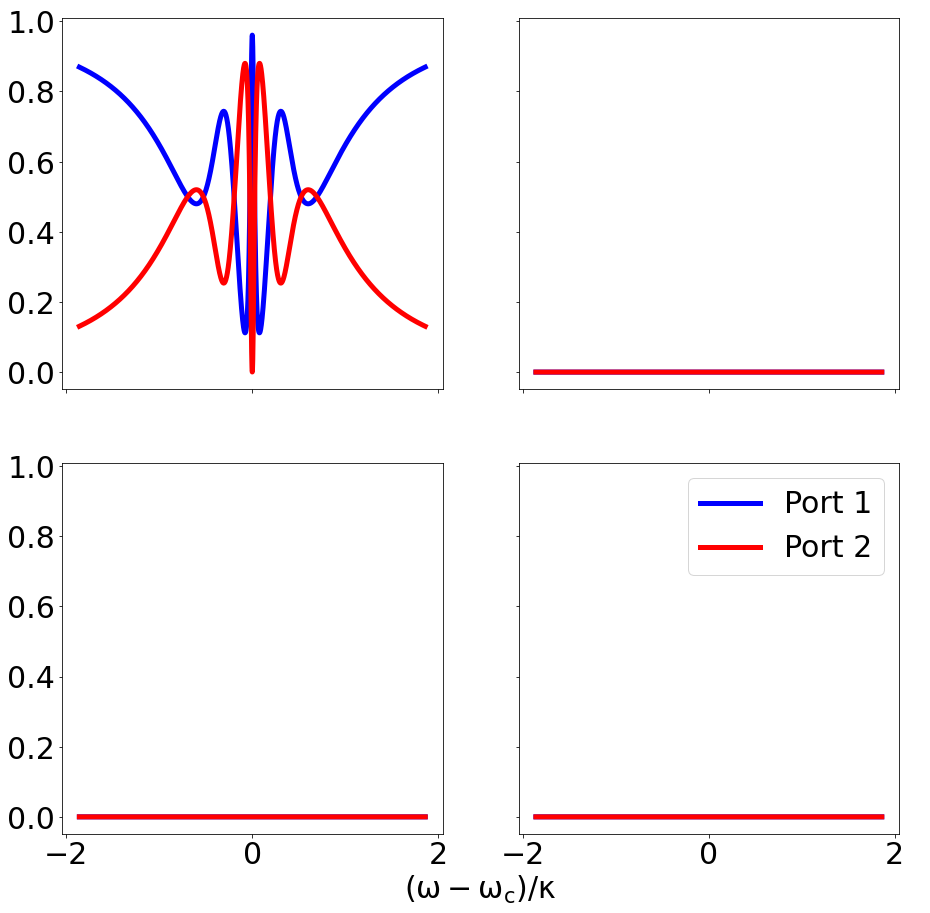

In [29]:
fig, axs = plt.subplots(len(we1_list), len(we2_list), sharex=True, sharey=True, figsize=(15, 15))

for i in range(len(we1_list)):
    for j in range(len(we2_list)):
        
        axs[i][j].plot(x_1/sim_params['k'], casc_t[i][j], 'b', label='Port 1', linewidth=5)
        axs[i][j].plot(x_1/sim_params['k'], casc_r[i][j], 'r', label='Port 2', linewidth=5)
        # axs[i][j].set_ylim([0,1])
axs[1][1].legend()
fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'mathtext.default':  'regular' })

plt.xlabel('$(\omega-\omega_{c})/\kappa$')
# plt.ylabel('Transmission')
plt.savefig('tran_ref.svg')
